In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
def magic_rem(img,K):
    z=img.reshape((-1,3))
    
    # Convert uint8 to float
    z=np.float32(z)
    
    # Define criteria and accuracy
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    
    # Apply K-Means
    ret, label, center = cv2.kmeans(z,K,None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    #Convert float to UINT8
    center=np.uint8(center)
    res=center[label.flatten()]
    clustered_img=res.reshape((img.shape))
    
    #Sorting the center list with sum as lamda function
    #sort_fn = lambda row: sum(row)
    #center = sorted(center, key=sort_fn)

    #Utilising the least frequent color 
    pixels = clustered_img.reshape(-1, 3)

    # Get unique colors and their counts
    unique_colors, color_counts = np.unique(pixels, axis=0, return_counts=True)
    clr = unique_colors[np.argmin(color_counts)]

    #Keep the pixels with clr color to black rest as white
    filtered_img = np.where(clustered_img == clr, 0, 255)
    #cv2.imwrite('img_pp.jpg',filtered_img)
    return filtered_img

In [3]:
counter = 1

(74, 295, 3)


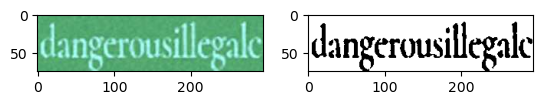

In [770]:
k = 101
idx = str(random.randint(10000*(k),10000*(k)+9999))+'.jpg'
img = cv2.imread(f'/home/ubuntu/Arrun/CustomOCR/OCRTrainData/{k}/'+idx)
print(np.shape(img))
plt.subplot(1,2,1).imshow(img)
plt.subplot(1,2,2).imshow(magic_rem(img,2))
plt.show()

In [769]:
root_dir = "/home/ubuntu/Arrun/OCR_SBT+/"
os.chdir(os.path.join(root_dir,"images"))
cv2.imwrite(img = img,filename = f'image_{counter}.png')
os.chdir(os.path.join(root_dir,"segmaps"))
cv2.imwrite(img = magic_rem(img,2),filename = f'segmap_{counter}.png')
counter += 1